In [1]:
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
import numpy as np

2023-05-10 21:25:00.114792: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 21:25:00.254005: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


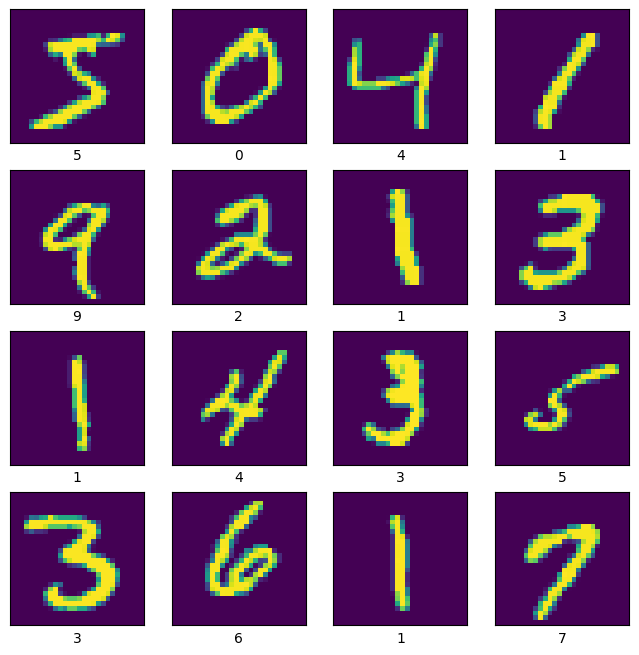

In [2]:
# First on MNIST data
(xtrain, ytrain), (xtest, ytest) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
xtrain, xtest = xtrain / 255.0, xtest / 255.0

#%%
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i])
    plt.xlabel(str(ytrain[i]))
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

2023-05-10 21:25:10.074663: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 21:25:10.554537: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9681 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:67:00.0, compute capability: 7.5


Epoch 1/10


/u/efk7cz/.conda/envs/dm1/lib/python3.9/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-05-10 21:25:12.691180: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-05-10 21:25:13.827661: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f040cffdaa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-10 21:25:13.827689: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2023-05-10 21:25:13.833437: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-10 21:25:14.103247: I tensorf

469/469 [==============================] - 11s 11ms/step - loss: 0.1668 - accuracy: 0.9459 - val_loss: 0.0477 - val_accuracy: 0.9863
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0408 - accuracy: 0.9873 - val_loss: 0.0306 - val_accuracy: 0.9912
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0269 - accuracy: 0.9918 - val_loss: 0.0298 - val_accuracy: 0.9910
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.0232 - val_accuracy: 0.9919
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0175 - accuracy: 0.9948 - val_loss: 0.0360 - val_accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0155 - accuracy: 0.9947 - val_loss: 0.0232 - val_accuracy: 0.9922
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0126 - accuracy: 0.9962 - val_loss: 0.0245 - val_accuracy: 0.9929
Epoch 8/1

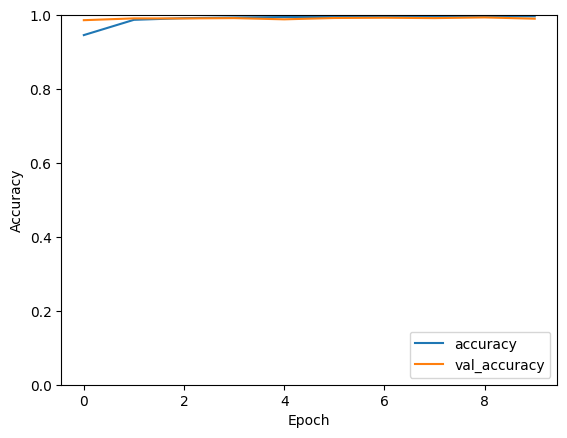

In [3]:
# Define model

model = keras.Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu', padding="same"),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding="same"),
        Conv2D(64, (3, 3), activation='relu', padding="same"),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding="same"),
        Conv2D(128, (3, 3), activation='relu', padding="same"),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax'),
    ]
)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

history = model.fit(xtrain, ytrain, epochs=10, 
                    validation_data=(xtest, ytest),
                    batch_size=128, use_multiprocessing=True)

#%%

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(xtest,  ytest, verbose=2)

print(test_acc)

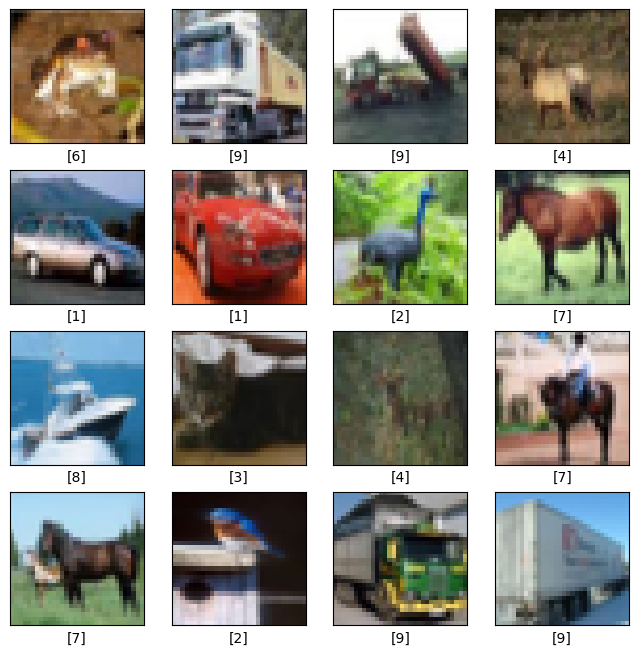

In [4]:
# Now for cifar-10 dataset
(xtrain, ytrain), (xtest, ytest) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
xtrain, xtest = xtrain / 255.0, xtest / 255.0

#%%
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i])
    plt.xlabel(str(ytrain[i]))
plt.show()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

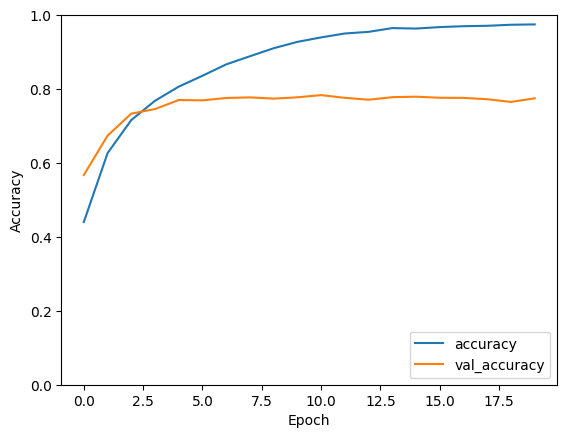

In [5]:
# Define model

# Define model

model = keras.Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), activation='relu', padding="same"),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding="same"),
        Conv2D(64, (3, 3), activation='relu', padding="same"),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding="same"),
        Conv2D(128, (3, 3), activation='relu', padding="same"),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax'),
    ]
)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

history = model.fit(xtrain, ytrain, epochs=20, 
                    validation_data=(xtest, ytest),
                    batch_size=128, use_multiprocessing=True)

#%%

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(xtest,  ytest, verbose=2)

print(test_acc)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

2023-05-10 21:27:30.963228: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


391/391 [==============================] - 7s 12ms/step - loss: 1.7827 - accuracy: 0.3351 - val_loss: 1.3609 - val_accuracy: 0.5073
Epoch 2/30
391/391 [==============================] - 4s 11ms/step - loss: 1.3152 - accuracy: 0.5259 - val_loss: 1.1525 - val_accuracy: 0.5875
Epoch 3/30
391/391 [==============================] - 4s 11ms/step - loss: 1.1135 - accuracy: 0.6054 - val_loss: 0.9980 - val_accuracy: 0.6425
Epoch 4/30
391/391 [==============================] - 4s 11ms/step - loss: 0.9830 - accuracy: 0.6527 - val_loss: 0.8652 - val_accuracy: 0.6949
Epoch 5/30
391/391 [==============================] - 4s 11ms/step - loss: 0.8869 - accuracy: 0.6854 - val_loss: 0.8191 - val_accuracy: 0.7174
Epoch 6/30
391/391 [==============================] - 4s 11ms/step - loss: 0.8307 - accuracy: 0.7095 - val_loss: 0.7489 - val_accuracy: 0.7396
Epoch 7/30
391/391 [==============================] - 4s 11ms/step - loss: 0.7739 - accuracy: 0.7293 - val_loss: 0.7433 - val_accuracy: 0.7415
Epoch 8/30

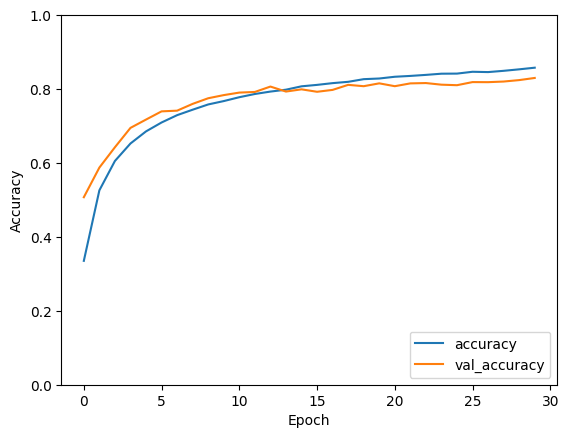

In [6]:
# Experiment with regularization
dr = 0.3 # Dropout ratio
model = keras.Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), activation='relu', padding="same"),
        MaxPooling2D((2, 2)),
        Dropout(dr),
        Conv2D(64, (3, 3), activation='relu', padding="same"),
        Conv2D(64, (3, 3), activation='relu', padding="same"),
        MaxPooling2D((2, 2)),
        Dropout(dr),
        Conv2D(128, (3, 3), activation='relu', padding="same"),
        Conv2D(128, (3, 3), activation='relu', padding="same"),
        MaxPooling2D((2, 2)),
        Dropout(dr),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dr),
        Dense(10, activation='softmax'),
    ]
)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

history = model.fit(xtrain, ytrain, epochs=30, 
                    validation_data=(xtest, ytest),
                    batch_size=128, use_multiprocessing=True)

#%%

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(xtest,  ytest, verbose=2)

print(test_acc)